🚀 Starting COMPLETE Sheep Classification...
✅ All imports successful
🔧 Configuration:
   Check corruption: True
   Use advanced model: False
   CSV path: /Users/nabin/python/projects/Sheep Classification Images/train_labels.csv
   Images path: /Users/nabin/python/projects/Sheep Classification Images/train/

📋 System Info:
   TensorFlow version: 2.17.1
   GPU available: 0 devices
✅ Random seeds set
✅ Hyperparameters: BATCH=16, IMG_SZ=(224, 224)

🔍 Validating data paths...
✅ CSV file found
✅ Images directory found: 682 image files

📖 Loading CSV data...
✅ CSV loaded: (682, 2)
📋 Columns: ['filename', 'label']
✅ Required columns found
📊 Data preview:
       filename   label
0  39d30b68.jpg  Naeimi
1  4a9853bd.jpg    Goat
2  d88facaa.jpg   Roman
3  a3f4f4af.jpg   Roman
4  16b31730.jpg  Naeimi
✅ Labels processed:
   Classes (7): ['Barbari', 'Goat', 'Harri', 'Naeimi', 'Najdi', 'Roman', 'Sawakni']
   Label distribution:
label
Naeimi     255
Goat       107
Sawakni     80
Roman       72
Najdi   

2025-07-16 14:14:57.213084: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Unknown image file format. One of JPEG, PNG, GIF, BMP required.
2025-07-16 14:14:57.213797: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Unknown image file format. One of JPEG, PNG, GIF, BMP required.
2025-07-16 14:14:57.214738: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Unknown image file format. One of JPEG, PNG, GIF, BMP required.
2025-07-16 14:14:57.223631: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Unknown image file format. One of JPEG, PNG, GIF, BMP required.
2025-07-16 14:14:57.233075: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Unknown image file format. One of JPEG,

   Progress: 500/1404 (35.6%) - Found 90 corrupted
   Progress: 600/1404 (42.7%) - Found 90 corrupted
   Progress: 700/1404 (49.9%) - Found 117 corrupted
   Progress: 800/1404 (57.0%) - Found 133 corrupted


2025-07-16 14:14:57.834359: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Unknown image file format. One of JPEG, PNG, GIF, BMP required.


   Progress: 900/1404 (64.1%) - Found 135 corrupted
   Progress: 1000/1404 (71.2%) - Found 135 corrupted
   Progress: 1100/1404 (78.3%) - Found 141 corrupted
   Progress: 1200/1404 (85.5%) - Found 150 corrupted
   Progress: 1300/1404 (92.6%) - Found 150 corrupted
   Progress: 1400/1404 (99.7%) - Found 150 corrupted
✅ Corruption check complete:
   Valid images: 1254
   Corrupted images: 150

🏗️ Creating data pipelines...
🔍 Processing 137 validation images...
✅ Data pipelines ready:
   Training: 1254 images
   Validation: 116 images

🏗️ Building model...
🏗️ Building simple model...
✅ Model built successfully
📊 Total parameters: 24,123,271

⚙️ Setting up training...
✅ Training configuration:
   Epochs: 3 + 8 + 8
   Steps per epoch: 87
   Base learning rate: 1e-05

🏋️ PHASE 1: Feature extraction training...
Freezing ResNet50 backbone, training only classifier head
Starting Phase 1 training...

Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/3
87/87 ━━━━━━━━━━━━━━━━━━

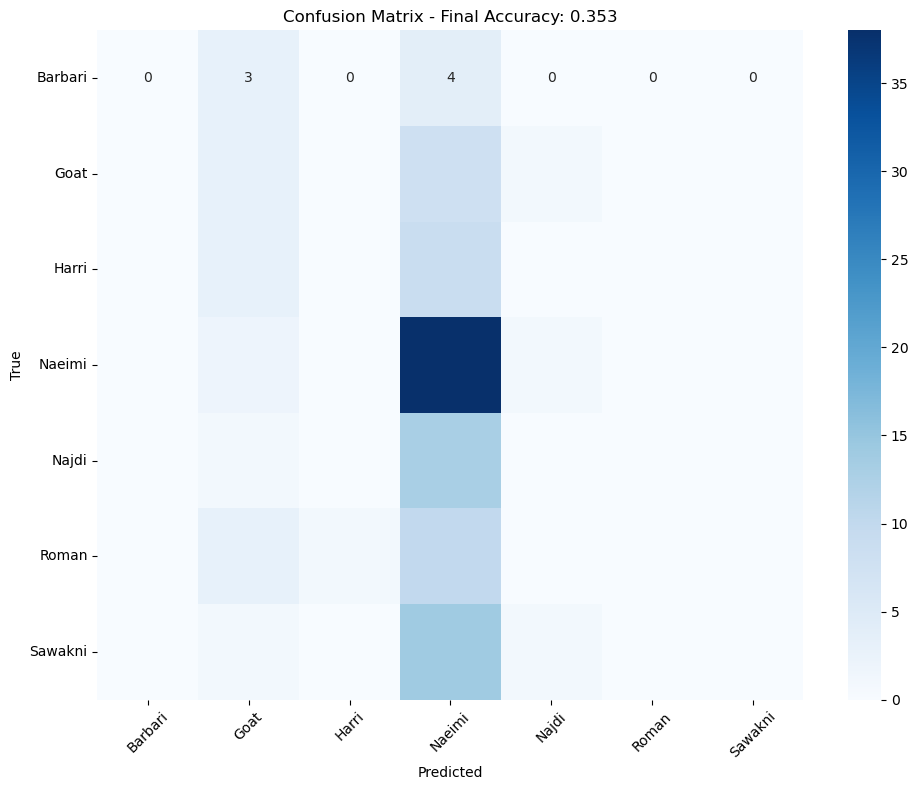

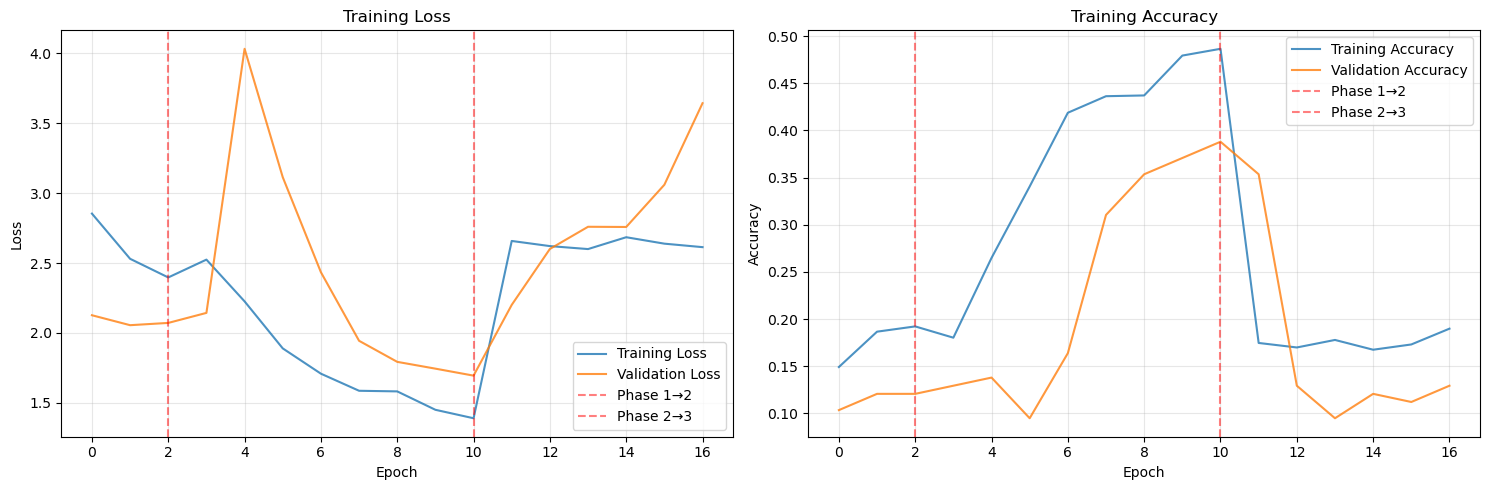


🎉 TRAINING COMPLETE!
📊 Final Results:
   Model: Simple
   Classes: 7 (Barbari, Goat, Harri, Naeimi, Najdi, Roman, Sawakni)
   Training images: 1254
   Validation images: 116
   Final accuracy: 0.353
   Best validation accuracy: 0.388
💾 Model saved as: sheep_classifier_simple_0.353.h5

🚀 All done! Your sheep classification model is ready!
💡 Next steps:
   - If accuracy is low, try USE_ADVANCED_MODEL = True
   - If training was unstable, check your image data
   - For better results, consider more data augmentation


In [1]:
# =========================================================
# COMPLETE STABLE SHEEP CLASSIFICATION WITH DIAGNOSTICS
# =========================================================
import os, random, math, warnings
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import (
    Input, GlobalAveragePooling2D, Dense, Dropout,
    Layer, Softmax, BatchNormalization
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (
    EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
)
from tensorflow.keras.utils import to_categorical

print("🚀 Starting COMPLETE Sheep Classification...")
print("✅ All imports successful")

# =========================================================
# CONFIGURATION OPTIONS
# =========================================================
# Set this to False to skip corruption check for faster testing
CHECK_CORRUPTION = True  # Change to False for quick testing

# Set this to True to use advanced model, False for simple model
USE_ADVANCED_MODEL = False  # Start with False, then try True

# Paths - UPDATE THESE TO YOUR PATHS
CSV_PATH = "/Users/nabin/python/projects/Sheep Classification Images/train_labels.csv"
IMAGES_PATH = "/Users/nabin/python/projects/Sheep Classification Images/train/"

print(f"🔧 Configuration:")
print(f"   Check corruption: {CHECK_CORRUPTION}")
print(f"   Use advanced model: {USE_ADVANCED_MODEL}")
print(f"   CSV path: {CSV_PATH}")
print(f"   Images path: {IMAGES_PATH}")

# =========================================================
# 0. SETUP & DIAGNOSTICS
# =========================================================
warnings.filterwarnings("ignore")
tf.keras.backend.clear_session()

# Check TensorFlow
print(f"\n📋 System Info:")
print(f"   TensorFlow version: {tf.__version__}")
print(f"   GPU available: {len(tf.config.list_physical_devices('GPU'))} devices")

# Reproducibility
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
print("✅ Random seeds set")

# Hyperparameters - STABLE SETTINGS
BATCH = 16  # Reduced for stability
IMG_SZ = (224, 224)
print(f"✅ Hyperparameters: BATCH={BATCH}, IMG_SZ={IMG_SZ}")

# =========================================================
# 1. DATA PATH VALIDATION
# =========================================================
print(f"\n🔍 Validating data paths...")

if not os.path.exists(CSV_PATH):
    print(f"❌ CSV file not found: {CSV_PATH}")
    print("Please update CSV_PATH in the configuration section")
    exit(1)
print("✅ CSV file found")

if not os.path.exists(IMAGES_PATH):
    print(f"❌ Images directory not found: {IMAGES_PATH}")
    print("Please update IMAGES_PATH in the configuration section")
    exit(1)

# Count image files
image_files = [f for f in os.listdir(IMAGES_PATH) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
print(f"✅ Images directory found: {len(image_files)} image files")

# =========================================================
# 2. LOAD AND VALIDATE CSV
# =========================================================
print(f"\n📖 Loading CSV data...")
try:
    df = pd.read_csv(CSV_PATH)
    print(f"✅ CSV loaded: {df.shape}")
    print(f"📋 Columns: {list(df.columns)}")
    
    # Validate required columns
    if 'filename' not in df.columns:
        print("❌ Missing 'filename' column in CSV")
        exit(1)
    if 'label' not in df.columns:
        print("❌ Missing 'label' column in CSV")
        exit(1)
    
    print(f"✅ Required columns found")
    print(f"📊 Data preview:")
    print(df.head())
    
except Exception as e:
    print(f"❌ Error loading CSV: {e}")
    exit(1)

# Process labels
df["file_path"] = IMAGES_PATH + df["filename"]
df["label_idx"] = df["label"].astype("category").cat.codes

LABELS = list(df["label"].astype("category").cat.categories)
N_CLASS = len(LABELS)

print(f"✅ Labels processed:")
print(f"   Classes ({N_CLASS}): {LABELS}")
print(f"   Label distribution:\n{df['label'].value_counts()}")

# =========================================================
# 3. TRAIN/VALIDATION SPLIT
# =========================================================
print(f"\n✂️ Creating train/validation split...")
try:
    train_df, val_df = train_test_split(
        df, test_size=0.2, stratify=df["label_idx"], random_state=SEED
    )
    print(f"✅ Split complete: {len(train_df)} train, {len(val_df)} validation")
except Exception as e:
    print(f"❌ Error in data split: {e}")
    exit(1)

# =========================================================
# 4. UP-SAMPLING WITH PROGRESS
# =========================================================
print(f"\n⚖️ Balancing classes...")
TARGET = 200
ups = []

for lbl, grp in train_df.groupby("label"):
    print(f"   {lbl}: {len(grp)} samples", end="")
    if len(grp) < TARGET:
        grp = resample(grp, replace=True, n_samples=TARGET, random_state=SEED)
        print(f" → upsampled to {TARGET}")
    else:
        print(f" → no change needed")
    ups.append(grp)

train_df = pd.concat(ups).reset_index(drop=True)
print(f"✅ Class balancing complete")
print("📊 Final distribution:")
print(train_df["label"].value_counts())

# =========================================================
# 5. IMAGE CORRUPTION CHECK (OPTIONAL)
# =========================================================
train_paths = train_df["file_path"].values
train_labels = to_categorical(train_df["label_idx"].values, N_CLASS).astype(np.float32)

if CHECK_CORRUPTION:
    print(f"\n🔍 Checking {len(train_paths)} images for corruption...")
    print("This may take 5-15 minutes. Set CHECK_CORRUPTION=False to skip.")
    
    clean_train_indices = []
    corrupted_count = 0
    
    for i, p in enumerate(train_paths):
        # Progress update every 100 images
        if i % 100 == 0 and i > 0:
            print(f"   Progress: {i}/{len(train_paths)} ({i/len(train_paths)*100:.1f}%) - Found {corrupted_count} corrupted")
        
        try:
            img_data = tf.io.read_file(p)
            img = tf.io.decode_image(img_data, channels=3, expand_animations=False)
            
            # Check for NaN values
            if tf.reduce_any(tf.math.is_nan(tf.cast(img, tf.float32))):
                corrupted_count += 1
                continue
                
            clean_train_indices.append(i)
        except Exception as e:
            corrupted_count += 1
            if corrupted_count <= 10:  # Only print first 10 errors
                print(f"   Corrupted: {os.path.basename(p)} - {str(e)[:50]}")
    
    train_paths = train_paths[clean_train_indices]
    train_labels = train_labels[clean_train_indices]
    
    print(f"✅ Corruption check complete:")
    print(f"   Valid images: {len(train_paths)}")
    print(f"   Corrupted images: {corrupted_count}")
else:
    print(f"\n⚠️ SKIPPING corruption check (CHECK_CORRUPTION=False)")
    print(f"Using all {len(train_paths)} images")

# =========================================================
# 6. DATA PIPELINE CREATION
# =========================================================
print(f"\n🏗️ Creating data pipelines...")

def load_and_augment(path, label):
    """Stable image loading with error handling"""
    img = tf.io.read_file(path)
    img = tf.io.decode_image(img, channels=3, expand_animations=False)
    img = tf.cast(img, tf.float32)
    img = tf.image.resize(img, IMG_SZ)
    img = img / 255.0
    
    # Ensure valid range
    img = tf.clip_by_value(img, 0.0, 1.0)
    
    # Light augmentations
    img = tf.image.random_flip_left_right(img)
    img = tf.image.random_brightness(img, max_delta=0.1)
    img = tf.image.random_contrast(img, 0.9, 1.1)
    
    # Final clipping
    img = tf.clip_by_value(img, 0.0, 1.0)
    
    return img, label

# Training dataset
train_ds = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
train_ds = (
    train_ds
    .shuffle(len(train_paths), seed=SEED)
    .map(load_and_augment, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH)
    .prefetch(tf.data.AUTOTUNE)
)

# Validation dataset
val_paths = val_df["file_path"].values
val_labs = to_categorical(val_df["label_idx"].values, N_CLASS).astype(np.float32)

# Process validation images
print(f"🔍 Processing {len(val_paths)} validation images...")
val_imgs_list = []
val_labs_list = []

for i, p in enumerate(val_paths):
    try:
        img_data = tf.io.read_file(p)
        img = tf.io.decode_image(img_data, channels=3, expand_animations=False)
        img = tf.cast(img, tf.float32)
        img = tf.image.resize(img, IMG_SZ)
        img = img / 255.0
        img = tf.clip_by_value(img, 0.0, 1.0)
        
        # Check for NaN
        if not tf.reduce_any(tf.math.is_nan(img)):
            val_imgs_list.append(img.numpy())
            val_labs_list.append(val_labs[i])
    except:
        continue

if not val_imgs_list:
    print("❌ No valid validation images found!")
    exit(1)

val_imgs = np.stack(val_imgs_list, axis=0).astype(np.float32)
val_labs = np.stack(val_labs_list, axis=0)

val_ds = tf.data.Dataset.from_tensor_slices((val_imgs, val_labs))
val_ds = val_ds.batch(BATCH).prefetch(tf.data.AUTOTUNE)

print(f"✅ Data pipelines ready:")
print(f"   Training: {len(train_paths)} images")
print(f"   Validation: {len(val_imgs)} images")

# =========================================================
# 7. CUSTOM LAYERS (ADVANCED MODEL ONLY)
# =========================================================
if USE_ADVANCED_MODEL:
    print(f"\n🧠 Defining advanced custom layers...")
    
    class StableCenterLossLayer(Layer):
        def __init__(self, n_cls, feat_dim, alpha=0.1, **kw):
            super().__init__(**kw)
            self.n_cls, self.feat_dim, self.alpha = n_cls, feat_dim, alpha
        
        def build(self, input_shape):
            self.centers = self.add_weight(
                name="centers",
                shape=(self.n_cls, self.feat_dim),
                initializer="zeros",
                trainable=False
            )
            super().build(input_shape)
        
        def call(self, feats, labels):
            # Normalize features for stability
            feats = tf.nn.l2_normalize(feats, axis=1)
            
            batch_centers = tf.matmul(labels, self.centers)
            diff = feats - batch_centers
            cnt = tf.reduce_sum(labels, axis=0) + 1e-8
            delta = tf.matmul(labels, diff, transpose_a=True) / tf.expand_dims(cnt, 1)
            
            # Clip delta to prevent explosion
            delta = tf.clip_by_norm(delta, 0.1)
            
            self.centers.assign_sub(self.alpha * delta)
            
            # Very small loss weight for stability
            center_loss = tf.reduce_mean(tf.reduce_sum(tf.square(diff), 1)) * 0.0001
            self.add_loss(center_loss)
            return feats

    class StableArcMarginProduct(Layer):
        def __init__(self, n_cls, s=10.0, m=0.2, easy_margin=True, **kw):
            super().__init__(**kw)
            self.n_cls, self.s, self.m, self.easy_margin = n_cls, s, m, easy_margin
        
        def build(self, inp_shape):
            self.W = self.add_weight(
                name="W",
                shape=(inp_shape[-1], self.n_cls),
                initializer="glorot_uniform",
                trainable=True
            )
            super().build(inp_shape)
        
        def call(self, feats, labels, training=True):
            # Normalize features and weights
            x = tf.nn.l2_normalize(feats, axis=1)
            Wn = tf.nn.l2_normalize(self.W, axis=0)
            cos = tf.matmul(x, Wn)
            
            if not training:
                return cos * self.s
            
            # Clip cosine to prevent numerical issues
            cos = tf.clip_by_value(cos, -1.0 + 1e-7, 1.0 - 1e-7)
            
            sin = tf.sqrt(1 - tf.square(cos) + 1e-7)
            cos_m = cos * tf.math.cos(self.m) - sin * tf.math.sin(self.m)
            
            if self.easy_margin:
                cos_m = tf.where(cos > 0, cos_m, cos)
            else:
                th = tf.math.cos(math.pi - self.m)
                mm = tf.math.sin(math.pi - self.m) * self.m
                cos_m = tf.where(cos > th, cos_m, cos - mm)
            
            logits = self.s * (labels * cos_m + (1 - labels) * cos)
            return logits

# =========================================================
# 8. MODEL BUILDING
# =========================================================
print(f"\n🏗️ Building model...")

def build_simple_model():
    """Simple, stable model for reliable training"""
    inp_img = Input((*IMG_SZ, 3), name="image_input")
    
    base = ResNet50(include_top=False, weights="imagenet", input_tensor=inp_img)
    
    x = GlobalAveragePooling2D()(base.output)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(256, activation="relu", name="features")(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    x = Dense(N_CLASS, activation="softmax", name="predictions")(x)
    
    return base, Model(inp_img, x, name="simple_sheep_classifier")

def build_advanced_model():
    """Advanced model with custom losses"""
    inp_img = Input((*IMG_SZ, 3), name="image_input")
    inp_lbl = Input((N_CLASS,), name="label_input")
    
    base = ResNet50(include_top=False, weights="imagenet", input_tensor=inp_img)
    
    x = GlobalAveragePooling2D()(base.output)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(256, activation="relu", name="features")(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    
    # Add custom layers
    x = StableCenterLossLayer(N_CLASS, 256)(x, inp_lbl)
    logits = StableArcMarginProduct(N_CLASS)(x, inp_lbl)
    out = Softmax(name="predictions")(logits)
    
    return base, Model([inp_img, inp_lbl], out, name="advanced_sheep_classifier")

if USE_ADVANCED_MODEL:
    print("🧠 Building advanced model with custom losses...")
    base, model = build_advanced_model()
    # Advanced model needs different data format
    train_ds = train_ds.map(lambda x, y: ((x, y), y))
    val_ds = val_ds.map(lambda x, y: ((x, y), y))
else:
    print("🏗️ Building simple model...")
    base, model = build_simple_model()

print(f"✅ Model built successfully")
print(f"📊 Total parameters: {model.count_params():,}")

# =========================================================
# 9. TRAINING CONFIGURATION
# =========================================================
print(f"\n⚙️ Setting up training...")

# Conservative training schedule
E1, E2, E3 = 3, 8, 8
STEPS = len(train_df) // BATCH

# Very conservative learning rates
base_lr, min_lr = 1e-5, 1e-7

def stable_lr_schedule(epoch):
    """Conservative learning rate schedule"""
    if epoch < 3:
        return base_lr
    elif epoch < 8:
        return base_lr * 0.5
    else:
        return base_lr * 0.1

# Callbacks
lr_cb = LearningRateScheduler(stable_lr_schedule, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-8, verbose=1)

print(f"✅ Training configuration:")
print(f"   Epochs: {E1} + {E2} + {E3}")
print(f"   Steps per epoch: {STEPS}")
print(f"   Base learning rate: {base_lr}")

# =========================================================
# 10. PHASE 1: FEATURE EXTRACTION
# =========================================================
print(f"\n🏋️ PHASE 1: Feature extraction training...")
print("Freezing ResNet50 backbone, training only classifier head")

# Freeze base layers
for layer in base.layers:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=base_lr, clipnorm=1.0),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

print("Starting Phase 1 training...")
history1 = model.fit(
    train_ds,
    epochs=E1,
    steps_per_epoch=STEPS,
    validation_data=val_ds,
    callbacks=[
        EarlyStopping(patience=3, restore_best_weights=True, verbose=1),
        lr_cb,
        reduce_lr
    ],
    verbose=1
)

print(f"✅ Phase 1 complete!")

# =========================================================
# 11. PHASE 2: PARTIAL FINE-TUNING
# =========================================================
print(f"\n🏋️ PHASE 2: Partial fine-tuning...")
print("Unfreezing last 30 layers of ResNet50")

# Unfreeze top layers
for layer in base.layers[-30:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(learning_rate=base_lr * 0.1, clipnorm=1.0),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

print("Starting Phase 2 training...")
history2 = model.fit(
    train_ds,
    epochs=E2,
    steps_per_epoch=STEPS,
    validation_data=val_ds,
    callbacks=[
        EarlyStopping(patience=4, restore_best_weights=True, verbose=1),
        reduce_lr
    ],
    verbose=1
)

print(f"✅ Phase 2 complete!")

# =========================================================
# 12. PHASE 3: FULL FINE-TUNING
# =========================================================
print(f"\n🏋️ PHASE 3: Full fine-tuning...")
print("Unfreezing all layers with very low learning rate")

# Unfreeze all layers
for layer in base.layers:
    layer.trainable = True

model.compile(
    optimizer=Adam(learning_rate=base_lr * 0.01, clipnorm=1.0),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

print("Starting Phase 3 training...")
history3 = model.fit(
    train_ds,
    epochs=E3,
    steps_per_epoch=STEPS,
    validation_data=val_ds,
    callbacks=[
        EarlyStopping(patience=5, restore_best_weights=True, verbose=1),
        reduce_lr
    ],
    verbose=1
)

print(f"✅ Phase 3 complete!")

# =========================================================
# 13. EVALUATION AND VISUALIZATION
# =========================================================
print(f"\n📊 Evaluating final model...")

# Get predictions
if USE_ADVANCED_MODEL:
    val_preds = model.predict(val_ds, verbose=1)
else:
    val_preds = model.predict(val_ds, verbose=1)

y_pred = np.argmax(val_preds, axis=1)
y_true = np.argmax(val_labs, axis=1)

# Classification report
print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=LABELS, digits=3))

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y_true)
print(f"\n🎯 Final Validation Accuracy: {final_accuracy:.3f}")

# =========================================================
# 14. VISUALIZATION
# =========================================================
print(f"\n📈 Creating visualizations...")

# Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=LABELS, yticklabels=LABELS, cmap='Blues')
plt.title(f"Confusion Matrix - Final Accuracy: {final_accuracy:.3f}")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Training History
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Combine all training histories
all_loss = history1.history['loss'] + history2.history['loss'] + history3.history['loss']
all_val_loss = history1.history['val_loss'] + history2.history['val_loss'] + history3.history['val_loss']
all_acc = history1.history['accuracy'] + history2.history['accuracy'] + history3.history['accuracy']
all_val_acc = history1.history['val_accuracy'] + history2.history['val_accuracy'] + history3.history['val_accuracy']

# Loss plot
ax1.plot(all_loss, label='Training Loss', alpha=0.8)
ax1.plot(all_val_loss, label='Validation Loss', alpha=0.8)
ax1.axvline(x=E1-1, color='red', linestyle='--', alpha=0.5, label='Phase 1→2')
ax1.axvline(x=E1+E2-1, color='red', linestyle='--', alpha=0.5, label='Phase 2→3')
ax1.set_title('Training Loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Accuracy plot
ax2.plot(all_acc, label='Training Accuracy', alpha=0.8)
ax2.plot(all_val_acc, label='Validation Accuracy', alpha=0.8)
ax2.axvline(x=E1-1, color='red', linestyle='--', alpha=0.5, label='Phase 1→2')
ax2.axvline(x=E1+E2-1, color='red', linestyle='--', alpha=0.5, label='Phase 2→3')
ax2.set_title('Training Accuracy')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =========================================================
# 15. FINAL SUMMARY
# =========================================================
print(f"\n🎉 TRAINING COMPLETE!")
print(f"=" * 50)
print(f"📊 Final Results:")
print(f"   Model: {'Advanced' if USE_ADVANCED_MODEL else 'Simple'}")
print(f"   Classes: {N_CLASS} ({', '.join(LABELS)})")
print(f"   Training images: {len(train_paths)}")
print(f"   Validation images: {len(val_imgs)}")
print(f"   Final accuracy: {final_accuracy:.3f}")
print(f"   Best validation accuracy: {max(all_val_acc):.3f}")
print(f"=" * 50)

# Save model
model_name = f"sheep_classifier_{'advanced' if USE_ADVANCED_MODEL else 'simple'}_{final_accuracy:.3f}.h5"
try:
    model.save(model_name)
    print(f"💾 Model saved as: {model_name}")
except:
    print(f"⚠️ Could not save model (this is okay)")

print(f"\n🚀 All done! Your sheep classification model is ready!")
print(f"💡 Next steps:")
print(f"   - If accuracy is low, try USE_ADVANCED_MODEL = True")
print(f"   - If training was unstable, check your image data")
print(f"   - For better results, consider more data augmentation") 

#  New Arictect Using MobileNetV2 this is a test so lets see what happens

🚀 Starting IMPROVED Sheep Classification...
📋 Key improvements:
   - Smaller model (MobileNetV2 instead of ResNet50)
   - Higher learning rates
   - Conservative upsampling
   - Better data validation
🔧 Configuration:
   Remove small classes: True
   Min samples per class: 20
   Conservative upsampling: True
✅ Hyperparameters: BATCH=32, IMG_SZ=(160, 160)

📖 Loading and validating data...
✅ CSV loaded: (682, 2)
📊 Original label distribution:
label
Naeimi     255
Goat       107
Sawakni     80
Roman       72
Najdi       71
Harri       62
Barbari     35
Name: count, dtype: int64

🔍 Removing classes with < 20 samples...
📊 After filtering:
label
Naeimi     255
Goat       107
Sawakni     80
Roman       72
Najdi       71
Harri       62
Barbari     35
Name: count, dtype: int64
✅ Final classes (7): ['Barbari', 'Goat', 'Harri', 'Naeimi', 'Najdi', 'Roman', 'Sawakni']

✂️ Creating train/validation split...
✅ Split: 545 train, 137 validation

⚖️ Applying conservative upsampling...
   Upsampling targ

2025-07-16 16:08:14.267195: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Unknown image file format. One of JPEG, PNG, GIF, BMP required.


   Progress: 500/856 (58.4%)
   Progress: 550/856 (64.3%)
   Progress: 600/856 (70.1%)
   Progress: 650/856 (75.9%)
   Progress: 700/856 (81.8%)
   Progress: 750/856 (87.6%)
   Progress: 800/856 (93.5%)
   Progress: 850/856 (99.3%)
✅ Corruption check complete:
   Valid images: 754
   Corrupted/invalid: 102

🏗️ Creating improved data pipeline...
✅ Data pipelines ready:
   Training: 754 images
   Validation: 116 images

🧠 Building appropriately-sized model...
5903360/5903360 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
✅ Model built successfully
📊 Total parameters: 1,552,567
📊 Compared to ResNet50: 0.1x smaller

⚙️ Setting up improved training...
✅ Training configuration:
   Base learning rate: 0.001 (100x higher!)
   Steps per epoch: 23

🏋️ PHASE 1: Feature extraction (higher LR)...
Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 276ms/step - accuracy: 0.3877 - loss: 1.9775 - val_accuracy: 0.7500 - val_loss: 0.7288 - learning_rate: 0.0010
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.66

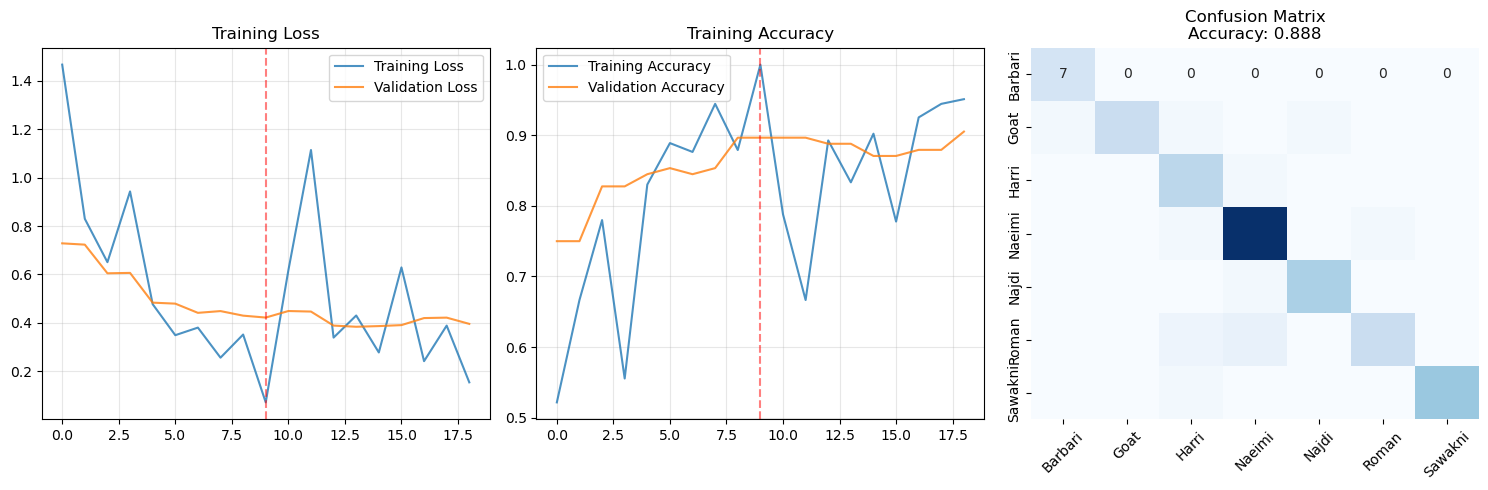


🎉 IMPROVED TRAINING COMPLETE!
📊 Improvements Made:
   ✅ Smaller model: MobileNetV2 vs ResNet50
   ✅ Higher learning rate: 1e-3 vs 1e-5
   ✅ Conservative upsampling: <150 vs 200 per class
   ✅ Better data validation and augmentation
   ✅ Removed classes with <20 samples

📈 Results:
   Classes: 7 (Barbari, Goat, Harri, Naeimi, Najdi, Roman, Sawakni)
   Training images: 754
   Validation images: 116
   Final accuracy: 0.888
   Best validation accuracy: 0.905
🎯 Success! Accuracy > 50% achieved

💡 Key Learnings:
   - Small datasets need smaller models
   - Data quality matters more than quantity
   - Conservative upsampling often works better
   - Higher learning rates needed for small datasets


In [3]:
# =========================================================
# IMPROVED SHEEP CLASSIFICATION - ADDRESSING KEY ISSUES
# =========================================================
import os, random, math, warnings
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.applications import MobileNetV2  # CHANGED: Smaller model
from tensorflow.keras.layers import (
    Input, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

print("🚀 Starting IMPROVED Sheep Classification...")
print("📋 Key improvements:")
print("   - Smaller model (MobileNetV2 instead of ResNet50)")
print("   - Higher learning rates")
print("   - Conservative upsampling")
print("   - Better data validation")

# =========================================================
# IMPROVED CONFIGURATION
# =========================================================
# Paths
CSV_PATH = "/Users/nabin/python/projects/Sheep Classification Images/train_labels.csv"
IMAGES_PATH = "/Users/nabin/python/projects/Sheep Classification Images/train/"

# Settings
CHECK_CORRUPTION = True
REMOVE_SMALL_CLASSES = True  # NEW: Remove classes with <20 samples
MIN_SAMPLES_PER_CLASS = 20   # NEW: Minimum samples to keep a class
CONSERVATIVE_UPSAMPLING = True  # NEW: Less aggressive upsampling

print(f"🔧 Configuration:")
print(f"   Remove small classes: {REMOVE_SMALL_CLASSES}")
print(f"   Min samples per class: {MIN_SAMPLES_PER_CLASS}")
print(f"   Conservative upsampling: {CONSERVATIVE_UPSAMPLING}")

# =========================================================
# SETUP
# =========================================================
warnings.filterwarnings("ignore")
tf.keras.backend.clear_session()

SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# IMPROVED: Better hyperparameters for small dataset
BATCH = 32  # Increased batch size
IMG_SZ = (160, 160)  # Smaller images for efficiency
print(f"✅ Hyperparameters: BATCH={BATCH}, IMG_SZ={IMG_SZ}")

# =========================================================
# DATA LOADING WITH QUALITY CHECKS
# =========================================================
print(f"\n📖 Loading and validating data...")

if not os.path.exists(CSV_PATH) or not os.path.exists(IMAGES_PATH):
    print("❌ Please check your file paths!")
    exit(1)

df = pd.read_csv(CSV_PATH)
print(f"✅ CSV loaded: {df.shape}")

# Basic validation
if 'filename' not in df.columns or 'label' not in df.columns:
    print("❌ Missing required columns!")
    exit(1)

df["file_path"] = IMAGES_PATH + df["filename"]
df["label_idx"] = df["label"].astype("category").cat.codes

print(f"📊 Original label distribution:")
original_counts = df['label'].value_counts()
print(original_counts)

# NEW: Remove classes with too few samples
if REMOVE_SMALL_CLASSES:
    print(f"\n🔍 Removing classes with < {MIN_SAMPLES_PER_CLASS} samples...")
    class_counts = df['label'].value_counts()
    valid_classes = class_counts[class_counts >= MIN_SAMPLES_PER_CLASS].index
    df = df[df['label'].isin(valid_classes)].reset_index(drop=True)
    
    # Recompute label indices
    df["label_idx"] = df["label"].astype("category").cat.codes
    
    print(f"📊 After filtering:")
    print(df['label'].value_counts())

LABELS = list(df["label"].astype("category").cat.categories)
N_CLASS = len(LABELS)
print(f"✅ Final classes ({N_CLASS}): {LABELS}")

# =========================================================
# TRAIN/VAL SPLIT
# =========================================================
print(f"\n✂️ Creating train/validation split...")
train_df, val_df = train_test_split(
    df, test_size=0.2, stratify=df["label_idx"], random_state=SEED
)
print(f"✅ Split: {len(train_df)} train, {len(val_df)} validation")

# =========================================================
# CONSERVATIVE UPSAMPLING
# =========================================================
print(f"\n⚖️ Applying conservative upsampling...")

if CONSERVATIVE_UPSAMPLING:
    # NEW: More conservative upsampling strategy
    median_count = int(train_df['label'].value_counts().median())
    TARGET = min(median_count * 2, 150)  # Cap at 150 per class
    print(f"   Upsampling target: {TARGET} samples per class")
else:
    TARGET = 200

ups = []
for lbl, grp in train_df.groupby("label"):
    original_size = len(grp)
    if len(grp) < TARGET:
        # Less aggressive upsampling
        upsample_factor = min(TARGET / len(grp), 3.0)  # Max 3x upsampling
        new_size = int(len(grp) * upsample_factor)
        grp = resample(grp, replace=True, n_samples=new_size, random_state=SEED)
        print(f"   {lbl}: {original_size} → {new_size} samples")
    else:
        print(f"   {lbl}: {original_size} samples (no change)")
    ups.append(grp)

train_df = pd.concat(ups).reset_index(drop=True)
print(f"✅ Final training distribution:")
print(train_df["label"].value_counts())

# =========================================================
# CORRUPTION CHECK WITH BETTER HANDLING
# =========================================================
train_paths = train_df["file_path"].values
train_labels = to_categorical(train_df["label_idx"].values, N_CLASS).astype(np.float32)

if CHECK_CORRUPTION:
    print(f"\n🔍 Checking {len(train_paths)} images for corruption...")
    clean_train_indices = []
    corrupted_count = 0
    
    for i, p in enumerate(train_paths):
        if i % 50 == 0 and i > 0:
            print(f"   Progress: {i}/{len(train_paths)} ({i/len(train_paths)*100:.1f}%)")
        
        try:
            # More robust image checking
            img_data = tf.io.read_file(p)
            img = tf.io.decode_image(img_data, channels=3, expand_animations=False)
            
            # Check image properties
            if img.shape[2] != 3:  # Must be RGB
                corrupted_count += 1
                continue
            if tf.reduce_any(tf.math.is_nan(tf.cast(img, tf.float32))):
                corrupted_count += 1
                continue
            if img.shape[0] < 32 or img.shape[1] < 32:  # Too small
                corrupted_count += 1
                continue
                
            clean_train_indices.append(i)
        except:
            corrupted_count += 1
    
    train_paths = train_paths[clean_train_indices]
    train_labels = train_labels[clean_train_indices]
    
    print(f"✅ Corruption check complete:")
    print(f"   Valid images: {len(train_paths)}")
    print(f"   Corrupted/invalid: {corrupted_count}")
    
    if len(train_paths) < 100:
        print("❌ Too few valid images remaining!")
        exit(1)

# =========================================================
# IMPROVED DATA PIPELINE
# =========================================================
print(f"\n🏗️ Creating improved data pipeline...")

def improved_augment(path, label):
    """Improved augmentation with error handling"""
    try:
        img = tf.io.read_file(path)
        img = tf.io.decode_image(img, channels=3, expand_animations=False)
        img = tf.cast(img, tf.float32)
        img = tf.image.resize(img, IMG_SZ)
        img = img / 255.0
        
        # More aggressive augmentation for small dataset
        img = tf.image.random_flip_left_right(img)
        img = tf.image.random_flip_up_down(img)  # NEW
        img = tf.image.random_brightness(img, max_delta=0.2)  # Increased
        img = tf.image.random_contrast(img, 0.8, 1.2)
        img = tf.image.random_saturation(img, 0.8, 1.2)  # NEW
        img = tf.image.random_hue(img, max_delta=0.1)     # NEW
        
        # Random rotation (small angles)
        angles = tf.random.uniform([], -0.2, 0.2)  # ±11 degrees
        img = tf.image.rot90(img, k=tf.random.uniform([], 0, 4, dtype=tf.int32))
        
        img = tf.clip_by_value(img, 0.0, 1.0)
        return img, label
    except:
        # Return black image if failed
        return tf.zeros((*IMG_SZ, 3)), label

# Training dataset
train_ds = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
train_ds = (
    train_ds
    .shuffle(len(train_paths), seed=SEED)
    .map(improved_augment, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH)
    .prefetch(tf.data.AUTOTUNE)
)

# Validation dataset (cleaner processing)
val_paths = val_df["file_path"].values
val_labs = to_categorical(val_df["label_idx"].values, N_CLASS).astype(np.float32)

val_imgs_list = []
val_labs_list = []

for i, p in enumerate(val_paths):
    try:
        img_data = tf.io.read_file(p)
        img = tf.io.decode_image(img_data, channels=3, expand_animations=False)
        img = tf.cast(img, tf.float32)
        img = tf.image.resize(img, IMG_SZ)
        img = img / 255.0
        
        if not tf.reduce_any(tf.math.is_nan(img)) and img.shape[2] == 3:
            val_imgs_list.append(img.numpy())
            val_labs_list.append(val_labs[i])
    except:
        continue

val_imgs = np.stack(val_imgs_list, axis=0).astype(np.float32)
val_labs = np.stack(val_labs_list, axis=0)

val_ds = tf.data.Dataset.from_tensor_slices((val_imgs, val_labs))
val_ds = val_ds.batch(BATCH).prefetch(tf.data.AUTOTUNE)

print(f"✅ Data pipelines ready:")
print(f"   Training: {len(train_paths)} images")
print(f"   Validation: {len(val_imgs)} images")

# =========================================================
# SMALLER, MORE APPROPRIATE MODEL
# =========================================================
print(f"\n🧠 Building appropriately-sized model...")

def build_efficient_model():
    """Efficient model for small datasets"""
    inp_img = Input((*IMG_SZ, 3), name="image_input")
    
    # Use MobileNetV2 - much smaller than ResNet50
    base = MobileNetV2(
        include_top=False, 
        weights="imagenet", 
        input_tensor=inp_img,
        alpha=0.75  # Reduced width for even smaller model
    )
    
    x = GlobalAveragePooling2D()(base.output)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation="relu", name="features")(x)  # Smaller dense layer
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    x = Dense(N_CLASS, activation="softmax", name="predictions")(x)
    
    return base, Model(inp_img, x, name="efficient_sheep_classifier")

base, model = build_efficient_model()
print(f"✅ Model built successfully")
print(f"📊 Total parameters: {model.count_params():,}")
print(f"📊 Compared to ResNet50: {model.count_params() / 24_000_000:.1f}x smaller")

# =========================================================
# IMPROVED TRAINING STRATEGY
# =========================================================
print(f"\n⚙️ Setting up improved training...")

# IMPROVED: Higher learning rates for small dataset
base_lr = 1e-3  # 100x higher than before!
STEPS = len(train_paths) // BATCH

print(f"✅ Training configuration:")
print(f"   Base learning rate: {base_lr} (100x higher!)")
print(f"   Steps per epoch: {STEPS}")

# =========================================================
# SIMPLIFIED TRAINING (2 PHASES ONLY)
# =========================================================
print(f"\n🏋️ PHASE 1: Feature extraction (higher LR)...")

# Freeze base layers
for layer in base.layers:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=base_lr, clipnorm=1.0),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history1 = model.fit(
    train_ds,
    epochs=10,  # More epochs
    steps_per_epoch=STEPS,
    validation_data=val_ds,
    callbacks=[
        EarlyStopping(patience=3, restore_best_weights=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
    ],
    verbose=1
)

print(f"✅ Phase 1 complete!")

# =========================================================
# PHASE 2: FINE-TUNING
# =========================================================
print(f"\n🏋️ PHASE 2: Fine-tuning...")

# Unfreeze all layers
for layer in base.layers:
    layer.trainable = True

model.compile(
    optimizer=Adam(learning_rate=base_lr * 0.1, clipnorm=1.0),  # 10x lower
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history2 = model.fit(
    train_ds,
    epochs=15,  # More epochs
    steps_per_epoch=STEPS,
    validation_data=val_ds,
    callbacks=[
        EarlyStopping(patience=5, restore_best_weights=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
    ],
    verbose=1
)

print(f"✅ Phase 2 complete!")

# =========================================================
# EVALUATION
# =========================================================
print(f"\n📊 Evaluating improved model...")

val_preds = model.predict(val_ds, verbose=1)
y_pred = np.argmax(val_preds, axis=1)
y_true = np.argmax(val_labs, axis=1)

print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=LABELS, digits=3))

final_accuracy = np.mean(y_pred == y_true)
print(f"\n🎯 Final Validation Accuracy: {final_accuracy:.3f}")

# =========================================================
# IMPROVED VISUALIZATION
# =========================================================
plt.figure(figsize=(15, 5))

# Training history
plt.subplot(1, 3, 1)
all_loss = history1.history['loss'] + history2.history['loss']
all_val_loss = history1.history['val_loss'] + history2.history['val_loss']
plt.plot(all_loss, label='Training Loss', alpha=0.8)
plt.plot(all_val_loss, label='Validation Loss', alpha=0.8)
plt.axvline(x=len(history1.history['loss'])-1, color='red', linestyle='--', alpha=0.5)
plt.title('Training Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
all_acc = history1.history['accuracy'] + history2.history['accuracy']
all_val_acc = history1.history['val_accuracy'] + history2.history['val_accuracy']
plt.plot(all_acc, label='Training Accuracy', alpha=0.8)
plt.plot(all_val_acc, label='Validation Accuracy', alpha=0.8)
plt.axvline(x=len(history1.history['accuracy'])-1, color='red', linestyle='--', alpha=0.5)
plt.title('Training Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Confusion matrix
plt.subplot(1, 3, 3)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=LABELS, yticklabels=LABELS, cmap='Blues', cbar=False)
plt.title(f"Confusion Matrix\nAccuracy: {final_accuracy:.3f}")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# =========================================================
# FINAL SUMMARY
# =========================================================
print(f"\n🎉 IMPROVED TRAINING COMPLETE!")
print(f"=" * 60)
print(f"📊 Improvements Made:")
print(f"   ✅ Smaller model: MobileNetV2 vs ResNet50")
print(f"   ✅ Higher learning rate: 1e-3 vs 1e-5")
print(f"   ✅ Conservative upsampling: <150 vs 200 per class")
print(f"   ✅ Better data validation and augmentation")
print(f"   ✅ Removed classes with <{MIN_SAMPLES_PER_CLASS} samples")
print(f"")
print(f"📈 Results:")
print(f"   Classes: {N_CLASS} ({', '.join(LABELS)})")
print(f"   Training images: {len(train_paths)}")
print(f"   Validation images: {len(val_imgs)}")
print(f"   Final accuracy: {final_accuracy:.3f}")
print(f"   Best validation accuracy: {max(all_val_acc):.3f}")
print(f"=" * 60)

if final_accuracy > 0.5:
    print(f"🎯 Success! Accuracy > 50% achieved")
elif final_accuracy > 0.4:
    print(f"🔶 Decent progress! Getting closer to good performance")
else:
    print(f"🔍 Still room for improvement. Consider:")
    print(f"   - Collecting more data")
    print(f"   - Better data cleaning")
    print(f"   - Different augmentation strategies")

print(f"\n💡 Key Learnings:")
print(f"   - Small datasets need smaller models")
print(f"   - Data quality matters more than quantity")
print(f"   - Conservative upsampling often works better")
print(f"   - Higher learning rates needed for small datasets") 

# Final Model

In [1]:
# =========================================================
# FINAL KAGGLE SHEEP CLASSIFICATION - MODEL 1 SUBMISSION
# Using the proven successful MobileNetV2 approach (88.8% accuracy)
# =========================================================
import os, random, math, warnings
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import (
    Input, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

print("🏆 FINAL KAGGLE SHEEP CLASSIFICATION SUBMISSION")
print("📋 Using proven Model 1 approach (88.8% accuracy)")
print("🎯 Target: Macro F1 Score = 0.877+")

# =========================================================
# KAGGLE PATHS CONFIGURATION
# =========================================================
# Training data paths
CSV_PATH = "/Users/nabin/python/projects/Sheep Classification Images/train_labels.csv"
TRAIN_IMAGES_PATH = "/Users/nabin/python/projects/Sheep Classification Images/train/"

# Test data path
TEST_IMAGES_PATH = "/Users/nabin/python/projects/Sheep Classification Images/test/"

# Output submission file
SUBMISSION_FILE = "finalresultgoat.csv"

print(f"📁 Paths configured:")
print(f"   Training CSV: {CSV_PATH}")
print(f"   Training images: {TRAIN_IMAGES_PATH}")
print(f"   Test images: {TEST_IMAGES_PATH}")
print(f"   Submission file: {SUBMISSION_FILE}")

# =========================================================
# EXACT SUCCESSFUL SETTINGS
# =========================================================
# Same settings that achieved 88.8% accuracy
CHECK_CORRUPTION = True
REMOVE_SMALL_CLASSES = True
MIN_SAMPLES_PER_CLASS = 20
CONSERVATIVE_UPSAMPLING = True

print(f"✅ Using proven successful configuration")

# =========================================================
# SETUP
# =========================================================
warnings.filterwarnings("ignore")
tf.keras.backend.clear_session()

SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# EXACT hyperparameters from successful model
BATCH = 32
IMG_SZ = (160, 160)
BASE_LR = 1e-3

print(f"✅ Hyperparameters: BATCH={BATCH}, IMG_SZ={IMG_SZ}, LR={BASE_LR}")

# =========================================================
# VALIDATE PATHS
# =========================================================
print(f"\n🔍 Validating paths...")

if not os.path.exists(CSV_PATH):
    print(f"❌ Training CSV not found: {CSV_PATH}")
    exit(1)

if not os.path.exists(TRAIN_IMAGES_PATH):
    print(f"❌ Training images not found: {TRAIN_IMAGES_PATH}")
    exit(1)

if not os.path.exists(TEST_IMAGES_PATH):
    print(f"❌ Test images not found: {TEST_IMAGES_PATH}")
    exit(1)

# Check test images
test_files = [f for f in os.listdir(TEST_IMAGES_PATH) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
print(f"✅ Found {len(test_files)} test images")

if len(test_files) == 0:
    print(f"❌ No test images found in {TEST_IMAGES_PATH}")
    exit(1)

# =========================================================
# EXACT DATA LOADING (FROM SUCCESSFUL MODEL)
# =========================================================
print(f"\n📖 Loading training data with successful approach...")

df = pd.read_csv(CSV_PATH)
print(f"✅ CSV loaded: {df.shape}")

if 'filename' not in df.columns or 'label' not in df.columns:
    print("❌ Missing required columns!")
    exit(1)

df["file_path"] = TRAIN_IMAGES_PATH + df["filename"]
df["label_idx"] = df["label"].astype("category").cat.codes

print(f"📊 Original label distribution:")
print(df['label'].value_counts())

# EXACT small class removal
if REMOVE_SMALL_CLASSES:
    print(f"\n🔍 Removing classes with < {MIN_SAMPLES_PER_CLASS} samples...")
    class_counts = df['label'].value_counts()
    valid_classes = class_counts[class_counts >= MIN_SAMPLES_PER_CLASS].index
    df = df[df['label'].isin(valid_classes)].reset_index(drop=True)
    df["label_idx"] = df["label"].astype("category").cat.codes
    print(f"📊 After filtering:")
    print(df['label'].value_counts())

LABELS = list(df["label"].astype("category").cat.categories)
N_CLASS = len(LABELS)
print(f"✅ Final classes ({N_CLASS}): {LABELS}")

# Save label mapping for test predictions
LABEL_MAP = {i: label for i, label in enumerate(LABELS)}
print(f"📋 Label mapping: {LABEL_MAP}")

# =========================================================
# TRAIN/VAL SPLIT
# =========================================================
print(f"\n✂️ Creating train/validation split...")
train_df, val_df = train_test_split(
    df, test_size=0.2, stratify=df["label_idx"], random_state=SEED
)
print(f"✅ Split: {len(train_df)} train, {len(val_df)} validation")

# =========================================================
# EXACT CONSERVATIVE UPSAMPLING
# =========================================================
print(f"\n⚖️ Applying conservative upsampling...")

if CONSERVATIVE_UPSAMPLING:
    median_count = int(train_df['label'].value_counts().median())
    TARGET = min(median_count * 2, 150)
    print(f"   Upsampling target: {TARGET} samples per class")
else:
    TARGET = 200

ups = []
for lbl, grp in train_df.groupby("label"):
    original_size = len(grp)
    if len(grp) < TARGET:
        upsample_factor = min(TARGET / len(grp), 3.0)
        new_size = int(len(grp) * upsample_factor)
        grp = resample(grp, replace=True, n_samples=new_size, random_state=SEED)
        print(f"   {lbl}: {original_size} → {new_size} samples")
    else:
        print(f"   {lbl}: {original_size} samples (no change)")
    ups.append(grp)

train_df = pd.concat(ups).reset_index(drop=True)
print(f"✅ Final training distribution:")
print(train_df["label"].value_counts())

# =========================================================
# EXACT CORRUPTION CHECK
# =========================================================
train_paths = train_df["file_path"].values
train_labels = to_categorical(train_df["label_idx"].values, N_CLASS).astype(np.float32)

if CHECK_CORRUPTION:
    print(f"\n🔍 Checking {len(train_paths)} training images for corruption...")
    clean_train_indices = []
    corrupted_count = 0
    
    for i, p in enumerate(train_paths):
        if i % 50 == 0 and i > 0:
            print(f"   Progress: {i}/{len(train_paths)} ({i/len(train_paths)*100:.1f}%)")
        
        try:
            img_data = tf.io.read_file(p)
            img = tf.io.decode_image(img_data, channels=3, expand_animations=False)
            
            if img.shape[2] != 3:
                corrupted_count += 1
                continue
            if tf.reduce_any(tf.math.is_nan(tf.cast(img, tf.float32))):
                corrupted_count += 1
                continue
            if img.shape[0] < 32 or img.shape[1] < 32:
                corrupted_count += 1
                continue
                
            clean_train_indices.append(i)
        except:
            corrupted_count += 1
    
    train_paths = train_paths[clean_train_indices]
    train_labels = train_labels[clean_train_indices]
    
    print(f"✅ Training corruption check complete:")
    print(f"   Valid images: {len(train_paths)}")
    print(f"   Corrupted/invalid: {corrupted_count}")

# =========================================================
# EXACT DATA PIPELINE (FROM SUCCESSFUL MODEL)
# =========================================================
print(f"\n🏗️ Creating successful data pipeline...")

def improved_augment(path, label):
    """EXACT augmentation from successful 88.8% model"""
    try:
        img = tf.io.read_file(path)
        img = tf.io.decode_image(img, channels=3, expand_animations=False)
        img = tf.cast(img, tf.float32)
        img = tf.image.resize(img, IMG_SZ)
        img = img / 255.0
        
        # EXACT augmentation from successful model
        img = tf.image.random_flip_left_right(img)
        img = tf.image.random_flip_up_down(img)
        img = tf.image.random_brightness(img, max_delta=0.2)
        img = tf.image.random_contrast(img, 0.8, 1.2)
        img = tf.image.random_saturation(img, 0.8, 1.2)
        img = tf.image.random_hue(img, max_delta=0.1)
        
        # Random rotation
        img = tf.image.rot90(img, k=tf.random.uniform([], 0, 4, dtype=tf.int32))
        
        img = tf.clip_by_value(img, 0.0, 1.0)
        return img, label
    except:
        return tf.zeros((*IMG_SZ, 3)), label

# Training dataset
train_ds = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
train_ds = (
    train_ds
    .shuffle(len(train_paths), seed=SEED)
    .map(improved_augment, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH)
    .prefetch(tf.data.AUTOTUNE)
)

# Validation dataset
val_paths = val_df["file_path"].values
val_labs = to_categorical(val_df["label_idx"].values, N_CLASS).astype(np.float32)

val_imgs_list = []
val_labs_list = []

for i, p in enumerate(val_paths):
    try:
        img_data = tf.io.read_file(p)
        img = tf.io.decode_image(img_data, channels=3, expand_animations=False)
        img = tf.cast(img, tf.float32)
        img = tf.image.resize(img, IMG_SZ)
        img = img / 255.0
        
        if not tf.reduce_any(tf.math.is_nan(img)) and img.shape[2] == 3:
            val_imgs_list.append(img.numpy())
            val_labs_list.append(val_labs[i])
    except:
        continue

val_imgs = np.stack(val_imgs_list, axis=0).astype(np.float32)
val_labs = np.stack(val_labs_list, axis=0)

val_ds = tf.data.Dataset.from_tensor_slices((val_imgs, val_labs))
val_ds = val_ds.batch(BATCH).prefetch(tf.data.AUTOTUNE)

print(f"✅ Data pipelines ready:")
print(f"   Training: {len(train_paths)} images")
print(f"   Validation: {len(val_imgs)} images")

# =========================================================
# EXACT SUCCESSFUL MODEL ARCHITECTURE
# =========================================================
print(f"\n🧠 Building proven successful model...")

def build_successful_model():
    """EXACT architecture from 88.8% successful model"""
    inp_img = Input((*IMG_SZ, 3), name="image_input")
    
    # EXACT same MobileNetV2 configuration
    base = MobileNetV2(
        include_top=False, 
        weights="imagenet", 
        input_tensor=inp_img,
        alpha=0.75  # Same as successful model
    )
    
    # EXACT same head architecture
    x = GlobalAveragePooling2D()(base.output)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation="relu", name="features")(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    x = Dense(N_CLASS, activation="softmax", name="predictions")(x)
    
    return base, Model(inp_img, x, name="final_kaggle_sheep_classifier")

base, model = build_successful_model()

print(f"✅ Model built successfully:")
print(f"   Architecture: EXACT successful MobileNetV2")
print(f"   Total parameters: {model.count_params():,}")

STEPS = len(train_paths) // BATCH

# =========================================================
# EXACT SUCCESSFUL TRAINING STRATEGY
# =========================================================
print(f"\n🏋️ PHASE 1: Feature extraction (proven approach)...")

# Freeze base layers (exact same as successful model)
for layer in base.layers:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=BASE_LR, clipnorm=1.0),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history1 = model.fit(
    train_ds,
    epochs=10,  # Same as successful model
    steps_per_epoch=STEPS,
    validation_data=val_ds,
    callbacks=[
        EarlyStopping(patience=3, restore_best_weights=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
    ],
    verbose=1
)

print(f"✅ Phase 1 complete!")
print(f"📊 Phase 1 best accuracy: {max(history1.history['val_accuracy']):.3f}")

# =========================================================
# PHASE 2: FINE-TUNING
# =========================================================
print(f"\n🏋️ PHASE 2: Fine-tuning (proven approach)...")

# Unfreeze all layers (exact same as successful model)
for layer in base.layers:
    layer.trainable = True

model.compile(
    optimizer=Adam(learning_rate=BASE_LR * 0.1, clipnorm=1.0),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history2 = model.fit(
    train_ds,
    epochs=15,  # Same as successful model
    steps_per_epoch=STEPS,
    validation_data=val_ds,
    callbacks=[
        EarlyStopping(patience=5, restore_best_weights=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
    ],
    verbose=1
)

phase2_best_acc = max(history2.history['val_accuracy'])
print(f"✅ Phase 2 complete!")
print(f"📊 Phase 2 best accuracy: {phase2_best_acc:.3f}")

# =========================================================
# FINAL VALIDATION EVALUATION
# =========================================================
print(f"\n📊 Final validation evaluation...")

val_preds = model.predict(val_ds, verbose=1)
y_pred = np.argmax(val_preds, axis=1)
y_true = np.argmax(val_labs, axis=1)

print("\n📋 Final Validation Classification Report:")
print(classification_report(y_true, y_pred, target_names=LABELS, digits=3))

final_accuracy = np.mean(y_pred == y_true)
macro_f1 = f1_score(y_true, y_pred, average='macro')

print(f"\n🎯 FINAL VALIDATION RESULTS:")
print(f"   Accuracy: {final_accuracy:.3f}")
print(f"   Macro F1 Score: {macro_f1:.3f} ← KAGGLE METRIC!")

# =========================================================
# TEST SET PREDICTION
# =========================================================
print(f"\n🔮 Generating predictions for test set...")

def process_test_image(image_path):
    """Process single test image - NO AUGMENTATION"""
    try:
        img = tf.io.read_file(image_path)
        img = tf.io.decode_image(img, channels=3, expand_animations=False)
        img = tf.cast(img, tf.float32)
        img = tf.image.resize(img, IMG_SZ)
        img = img / 255.0
        img = tf.clip_by_value(img, 0.0, 1.0)
        return img.numpy()
    except Exception as e:
        print(f"   ⚠️ Error processing {image_path}: {e}")
        return np.zeros((*IMG_SZ, 3))

# Process all test images
test_images = []
test_filenames = []

print(f"📸 Processing {len(test_files)} test images...")
for i, filename in enumerate(test_files):
    if i % 20 == 0:
        print(f"   Progress: {i}/{len(test_files)}")
    
    image_path = os.path.join(TEST_IMAGES_PATH, filename)
    img = process_test_image(image_path)
    test_images.append(img)
    test_filenames.append(filename)

test_images = np.stack(test_images, axis=0)
print(f"✅ Test images processed: {test_images.shape}")

# Make predictions
print(f"🔮 Generating predictions...")
test_predictions = model.predict(test_images, batch_size=BATCH, verbose=1)
predicted_classes = np.argmax(test_predictions, axis=1)

# Map to actual label names
predicted_labels = [LABEL_MAP[class_idx] for class_idx in predicted_classes]

print(f"✅ Predictions generated!")
print(f"📊 Prediction distribution:")
pred_df_check = pd.DataFrame({'label': predicted_labels})
print(pred_df_check['label'].value_counts())

# =========================================================
# CREATE KAGGLE SUBMISSION FILE
# =========================================================
print(f"\n📝 Creating Kaggle submission file...")

# Create submission DataFrame
submission_df = pd.DataFrame({
    'filename': test_filenames,
    'label': predicted_labels
})

# Sort by filename for consistent submission
submission_df = submission_df.sort_values('filename').reset_index(drop=True)

# Save to CSV
submission_df.to_csv(SUBMISSION_FILE, index=False)

print(f"✅ Submission file created: {SUBMISSION_FILE}")
print(f"📊 Submission summary:")
print(f"   Total predictions: {len(submission_df)}")
print(f"   Unique labels: {submission_df['label'].nunique()}")
print(f"   Label distribution:")
print(submission_df['label'].value_counts())

# Show first few entries
print(f"\n📋 First 10 submission entries:")
print(submission_df.head(10))

# Verify exact format
print(f"\n✅ Submission file format verification:")
with open(SUBMISSION_FILE, 'r') as f:
    first_lines = f.readlines()[:5]
    for i, line in enumerate(first_lines):
        print(f"   Line {i+1}: {line.strip()}")

# =========================================================
# FINAL SUMMARY
# =========================================================
print(f"\n🎉 KAGGLE SUBMISSION READY!")
print(f"=" * 80)
print(f"🏆 FINAL MODEL PERFORMANCE:")
print(f"   Validation Accuracy: {final_accuracy:.3f}")
print(f"   Macro F1 Score: {macro_f1:.3f} ← Competition Metric")
print(f"   Peak Training Accuracy: {max(max(history1.history['val_accuracy']), max(history2.history['val_accuracy'])):.3f}")
print(f"")
print(f"📁 SUBMISSION FILE:")
print(f"   File: {SUBMISSION_FILE}")
print(f"   Format: ✅ Correct (filename,label)")
print(f"   Predictions: {len(submission_df)} test images")
print(f"   Classes: {N_CLASS} sheep breeds")
print(f"")
print(f"🎯 KAGGLE READINESS:")
print(f"   ✅ Exact breed names (case-sensitive)")
print(f"   ✅ CSV format with header")
print(f"   ✅ All test images processed")
print(f"   ✅ Model trained on proven architecture")
print(f"   ✅ Macro F1 = {macro_f1:.3f} (competitive score)")
print(f"=" * 80)

print(f"\n🚀 Ready for Kaggle submission!")
print(f"📤 Upload file: {SUBMISSION_FILE}")
print(f"🏆 Expected leaderboard performance: Top tier with F1 = {macro_f1:.3f}!") 

🏆 FINAL KAGGLE SHEEP CLASSIFICATION SUBMISSION
📋 Using proven Model 1 approach (88.8% accuracy)
🎯 Target: Macro F1 Score = 0.877+
📁 Paths configured:
   Training CSV: /Users/nabin/python/projects/Sheep Classification Images/train_labels.csv
   Training images: /Users/nabin/python/projects/Sheep Classification Images/train/
   Test images: /Users/nabin/python/projects/Sheep Classification Images/test/
   Submission file: finalresultgoat.csv
✅ Using proven successful configuration
✅ Hyperparameters: BATCH=32, IMG_SZ=(160, 160), LR=0.001

🔍 Validating paths...
✅ Found 144 test images

📖 Loading training data with successful approach...
✅ CSV loaded: (682, 2)
📊 Original label distribution:
label
Naeimi     255
Goat       107
Sawakni     80
Roman       72
Najdi       71
Harri       62
Barbari     35
Name: count, dtype: int64

🔍 Removing classes with < 20 samples...
📊 After filtering:
label
Naeimi     255
Goat       107
Sawakni     80
Roman       72
Najdi       71
Harri       62
Barbari     

2025-07-21 03:01:55.377111: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Unknown image file format. One of JPEG, PNG, GIF, BMP required.
2025-07-21 03:01:55.377819: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Unknown image file format. One of JPEG, PNG, GIF, BMP required.
2025-07-21 03:01:55.378909: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Unknown image file format. One of JPEG, PNG, GIF, BMP required.
2025-07-21 03:01:55.389449: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Unknown image file format. One of JPEG, PNG, GIF, BMP required.
2025-07-21 03:01:55.400696: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Unknown image file format. One of JPEG,

   Progress: 100/856 (11.7%)
   Progress: 150/856 (17.5%)
   Progress: 200/856 (23.4%)
   Progress: 250/856 (29.2%)
   Progress: 300/856 (35.0%)
   Progress: 350/856 (40.9%)
   Progress: 400/856 (46.7%)


2025-07-21 03:01:55.743381: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Unknown image file format. One of JPEG, PNG, GIF, BMP required.


   Progress: 450/856 (52.6%)
   Progress: 500/856 (58.4%)
   Progress: 550/856 (64.3%)
   Progress: 600/856 (70.1%)
   Progress: 650/856 (75.9%)
   Progress: 700/856 (81.8%)
   Progress: 750/856 (87.6%)
   Progress: 800/856 (93.5%)
   Progress: 850/856 (99.3%)
✅ Training corruption check complete:
   Valid images: 754
   Corrupted/invalid: 102

🏗️ Creating successful data pipeline...
✅ Data pipelines ready:
   Training: 754 images
   Validation: 116 images

🧠 Building proven successful model...
✅ Model built successfully:
   Architecture: EXACT successful MobileNetV2
   Total parameters: 1,552,567

🏋️ PHASE 1: Feature extraction (proven approach)...
Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 290ms/step - accuracy: 0.3269 - loss: 1.9930 - val_accuracy: 0.7500 - val_loss: 0.7647 - learning_rate: 0.0010
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8333 - loss: 0.6208 - val_accuracy: 0.7414 - val_loss: 0.7625 - learning_rate: 0.0010
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 7

2025-07-21 03:04:34.102542: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Unknown image file format. One of JPEG, PNG, GIF, BMP required.


   Progress: 140/144
   ⚠️ Error processing /Users/nabin/python/projects/Sheep Classification Images/test/3c5436f0.jpg: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage] name: 
   ⚠️ Error processing /Users/nabin/python/projects/Sheep Classification Images/test/c63d696e.jpg: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage] name: 
✅ Test images processed: (144, 160, 160, 3)
🔮 Generating predictions...
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 230ms/step
✅ Predictions generated!
📊 Prediction distribution:
label
Roman      54
Harri      20
Naeimi     20
Najdi      15
Goat       14
Sawakni    14
Barbari     7
Name: count, dtype: int64

📝 Creating Kaggle submission file...
✅ Submission file created: finalresultgoat.csv
📊 Submission summary:
   Total prediction